In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
df = pd.read_csv(r"E:\Agriculture project\Data\Processed\Merged_data_features.csv")


<h3>Short-term Trend Analysis</h3>
generates line charts for each county, showing climate trends over time based on a **3-month moving average**. The plots include:

Each plot is saved as an image in the `Climate_Trends_Images` folder for further analysis.


In [ ]:

import os

# Load the data
df = pd.read_csv(r"E:\Agriculture project\Data\Processed\Merged_data_features.csv")

# Ensure Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter for 2015-2024
df_filtered = df[(df['Date'].dt.year >= 2015) & (df['Date'].dt.year <= 2024)]

# Extract county names based on column prefixes
county_names = set(col.split('_')[0] for col in df.columns if '_soil_3month_avg' in col)

# Output folder for images
output_folder = r"E:\Agriculture project\Analysis\Climate_Trends_Images"
os.makedirs(output_folder, exist_ok=True)

# Loop through counties and generate plots
for county in county_names:
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot soil moisture & temperature
    ax1.plot(df_filtered['Date'], df_filtered[f"{county}_soil_3month_avg"], label="Soil Moisture (%)", color='blue', linestyle='-')
    ax1.plot(df_filtered['Date'], df_filtered[f"{county}_temp_3month_avg"], label="Temperature (°C)", color='red', linestyle='--')
    ax1.set_ylabel("Soil Moisture (%) & Temperature (°C)")

    # Add drought threshold line
    ax1.axhline(y=15, color='blue', linestyle=':', label="Drought Threshold (15%)")

    # Create secondary y-axis for rainfall
    ax2 = ax1.twinx()
    ax2.plot(df_filtered['Date'], df_filtered[f"{county}_rain_3month_avg"], label="Rainfall (mm)", color='green', linestyle='-')
    ax2.set_ylabel("Rainfall (mm)")

    # Add title & legend
    plt.title(f"{county} Climate Trends (2015-2022) - 3-Month Moving Average")
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    plt.xticks(rotation=45)

    # Save the figure
    image_path = os.path.join(output_folder, f"{county}_climate_trend.png")
    plt.savefig(image_path, bbox_inches='tight', dpi=300)

    plt.close()

print(f"All county plots saved in {output_folder}")


All county plots saved in E:\Agriculture project\Analysis\Climate_Trends_Images


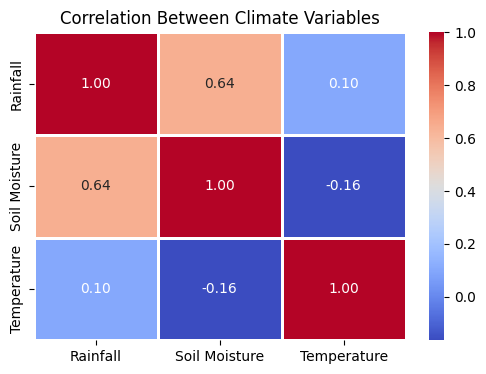

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv(r"E:\Agriculture project\Data\Processed\Merged_data_features.csv")
# Extract all climate variable columns
rainfall_cols = [col for col in df.columns if 'rain' in col]
soil_moisture_cols = [col for col in df.columns if 'soil' in col]
temperature_cols = [col for col in df.columns if 'temp' in col]

# Compute the average values of each variable category
df_climate = pd.DataFrame({
    "Rainfall": df[rainfall_cols].mean(axis=1),
    "Soil Moisture": df[soil_moisture_cols].mean(axis=1),
    "Temperature": df[temperature_cols].mean(axis=1),
})

# Compute correlation between the overall climate variables
corr_matrix = df_climate.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Correlation Between Climate Variables")
plt.show()


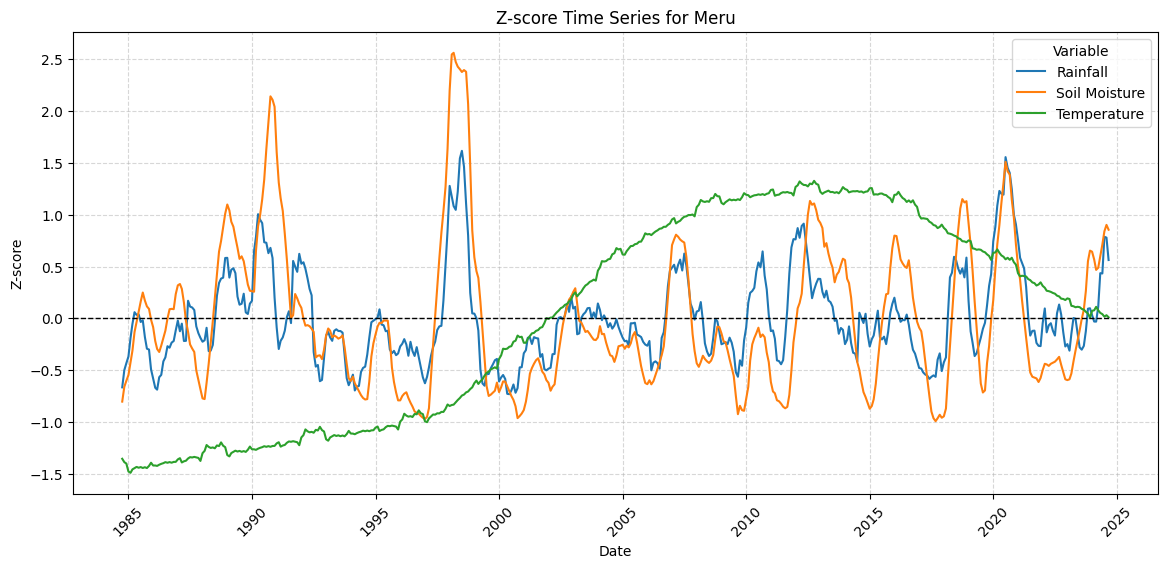

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_zscore_timeseries(data, county, window=5):
    """
    Plots time series of Z-scores for rainfall, soil moisture, and temperature.
    
    Parameters:
    data (pandas.DataFrame): Dataframe containing Z-score columns.
    county (str): Name of the county to plot.
    window (int): Rolling average window size for smoothing the plot.
    """
    plt.figure(figsize=(14, 6))
    
    # Convert 'Date' column to datetime format
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Extract and smooth Z-score columns
    zscore_cols = { 
        "Rainfall": f"{county}_rain_zscore", 
        "Soil Moisture": f"{county}_soil_zscore", 
        "Temperature": f"{county}_temp_zscore"
    }
    
    for label, col in zscore_cols.items():
        if col in data.columns:
            sns.lineplot(x=data['Date'], y=data[col].rolling(window=window).mean(), label=label)  # Apply rolling average

    # Styling
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Reference line at Z=0
    plt.title(f"Z-score Time Series for {county}")
    plt.xlabel("Date")
    plt.ylabel("Z-score")
    plt.xticks(rotation=45)  # Rotate dates
    plt.legend(title="Variable")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

# Load data
data = pd.read_csv(r"E:\Agriculture project\Data\Processed\Merged_data_features.csv")

# Plot for Meru with smoothing
plot_zscore_timeseries(data, "Meru", window=10)



In [13]:
print(df.columns)


Index(['Date', 'Nyeri_rain', 'Meru_rain', 'Embu_rain', 'Murang'a_rain',
       'Kericho_rain', 'Bomet_rain', 'Nandi_rain', 'Nyandarua_rain',
       'Kisii_rain',
       ...
       'Kakamega_temp_consec_anomaly', 'Nakuru_temp_consec_anomaly',
       'Laikipia_temp_consec_anomaly', 'Kitui_temp_consec_anomaly',
       'Machakos_temp_consec_anomaly', 'Makueni_temp_consec_anomaly',
       'Tharaka-Nithi_temp_consec_anomaly', 'West Pokot_temp_consec_anomaly',
       'Narok_temp_consec_anomaly', 'Baringo_temp_consec_anomaly'],
      dtype='object', length=689)
